#📌 미션에 도전하기 전에 먼저!!

이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있습니다.

* 원활한 피드백을 위해 미션을 제출할 때에도 아래 코드를 꼭 포함해서 제출해주세요!

* [참고] 한글폰트 설정 : https://github.com/ychoi-kr/koreanize-matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
#!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")


**<font color=red><데이터 특이사항></font>**

* 오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!
* [원본데이터] 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE


**🔽 데이터 현황을 확인하고 싶다면? 아래 코드를 통해 확인해보세요.**

In [2]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

#📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
* describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.
* 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!


🔽 출력 예시

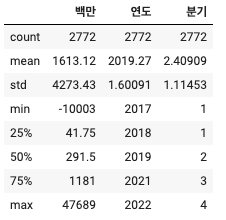

##데이터 전처리

In [3]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


In [5]:
df["연도"] = df["시점"].apply(lambda x: int(x.split(".")[0]))

In [6]:
df["분기"] = df["시점"].apply(lambda x: int(x.split("/")[0].split(".")[1]))

In [7]:
df["데이터"] = df["데이터"].replace("-", pd.np.nan).astype(float)
df["데이터"]

<ipython-input-7-4d7a2b518d21>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df["데이터"] = df["데이터"].replace("-", pd.np.nan).astype(float)


0       1054.0
1        946.0
2        791.0
3        854.0
4       2033.0
         ...  
2767    1278.0
2768    1154.0
2769    1076.0
2770    2325.0
2771     725.0
Name: 데이터, Length: 2772, dtype: float64

In [8]:
df.rename(columns = {'데이터' : '백만'}, inplace = True)

##기술통계

In [9]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


#📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

* 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
* pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


🔽 출력 예시

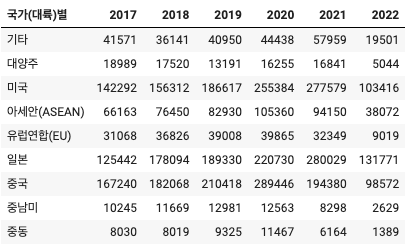

##pivot_table

In [10]:
pdf1 = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = '국가(대륙)별',
                     columns = '연도',
                     values = '백만',
                     aggfunc = 'sum')
pdf1

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571.0,36141.0,40950.0,44438.0,57959.0,19501.0
대양주,18989.0,17520.0,13191.0,16255.0,16841.0,5044.0
미국,142292.0,156312.0,186617.0,255384.0,277579.0,103416.0
아세안(ASEAN),66163.0,76450.0,82930.0,105360.0,94150.0,38072.0
유럽연합(EU),31068.0,36826.0,39008.0,39865.0,32349.0,9019.0
일본,125442.0,178094.0,189330.0,220730.0,280029.0,131771.0
중국,167240.0,182068.0,210418.0,289446.0,194380.0,98572.0
중남미,10245.0,11669.0,12981.0,12563.0,8298.0,2629.0
중동,8030.0,8019.0,9325.0,11467.0,6164.0,1389.0


#시각화

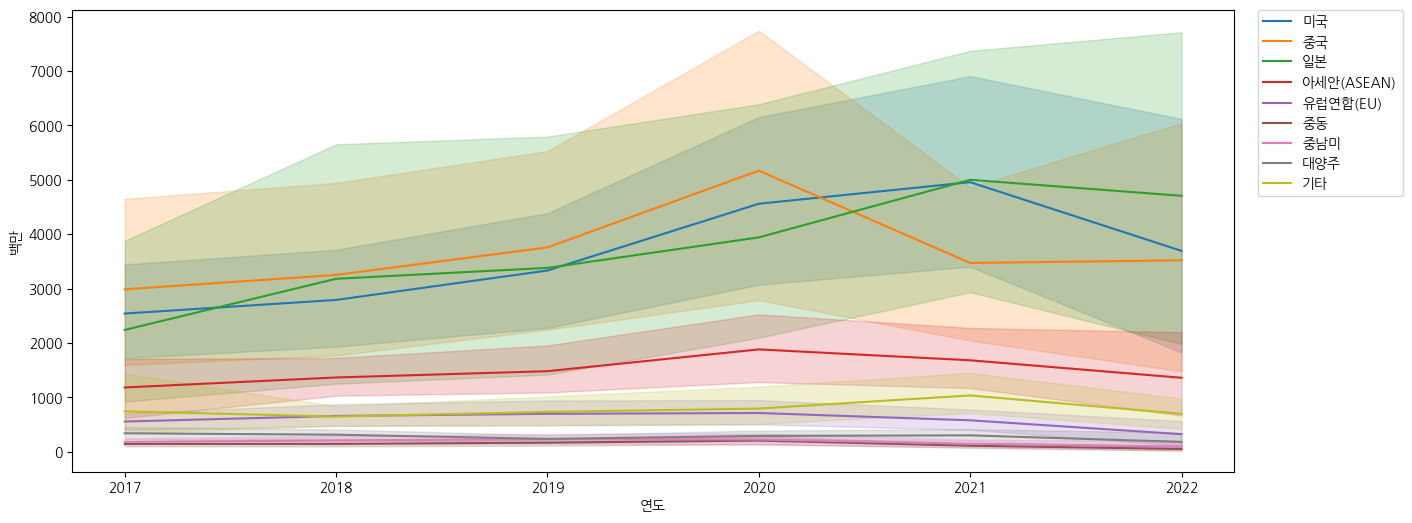

In [11]:
# 시각화를 위한 그래프 크기 설정
plt.figure(figsize=(15, 6))

# seaborn의 lineplot 함수를 사용하여 데이터 시각화
sns.lineplot(data=df, x="연도", y="백만", hue="국가(대륙)별")

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)


#📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

* 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

## 데이터프레임에서 2020년 데이터만 추출

In [12]:
df_2020 = df[df['연도'] == 2020]

## 온라인판매 gruopby()/unstack()

In [13]:
grouped_2020 = df_2020.groupby(['국가(대륙)별', '연도'])['백만'].sum().unstack()
grouped_2020

연도,2020
국가(대륙)별,
기타,44438.0
대양주,16255.0
미국,255384.0
아세안(ASEAN),105360.0
유럽연합(EU),39865.0
일본,220730.0
중국,289446.0
중남미,12563.0
중동,11467.0


##시각화

<Axes: xlabel='국가(대륙)별', ylabel='백만'>

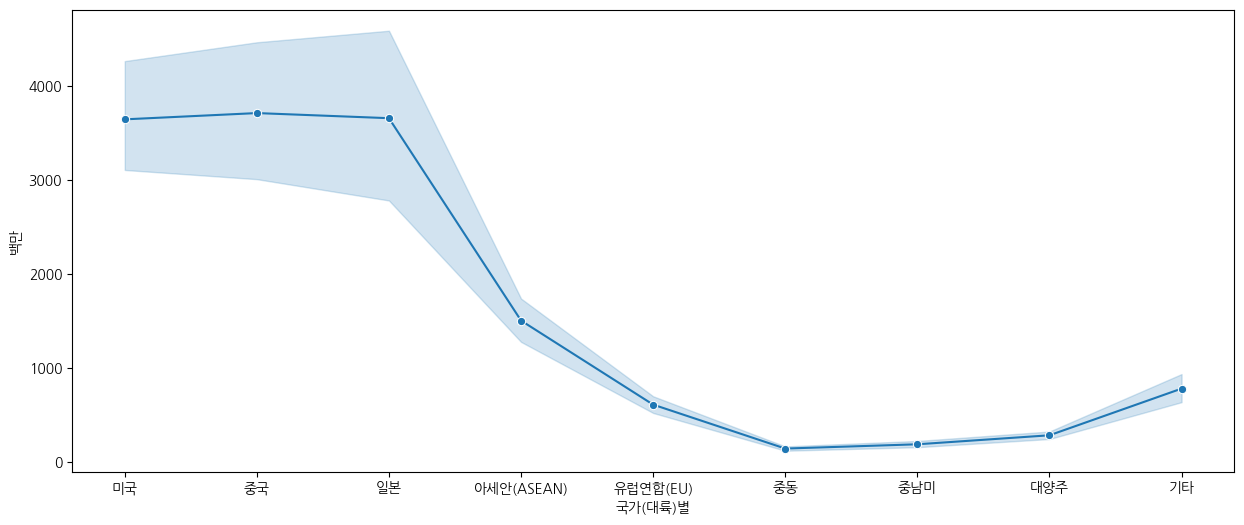

In [14]:
# 시각화를 위한 그래프 크기 설정
plt.figure(figsize=(15, 6))

# seaborn의 lineplot 함수를 사용하여 데이터 시각화
sns.lineplot(data=df, x="국가(대륙)별", y="백만",marker='o')


#📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

* 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
* 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

🔽 출력 예시
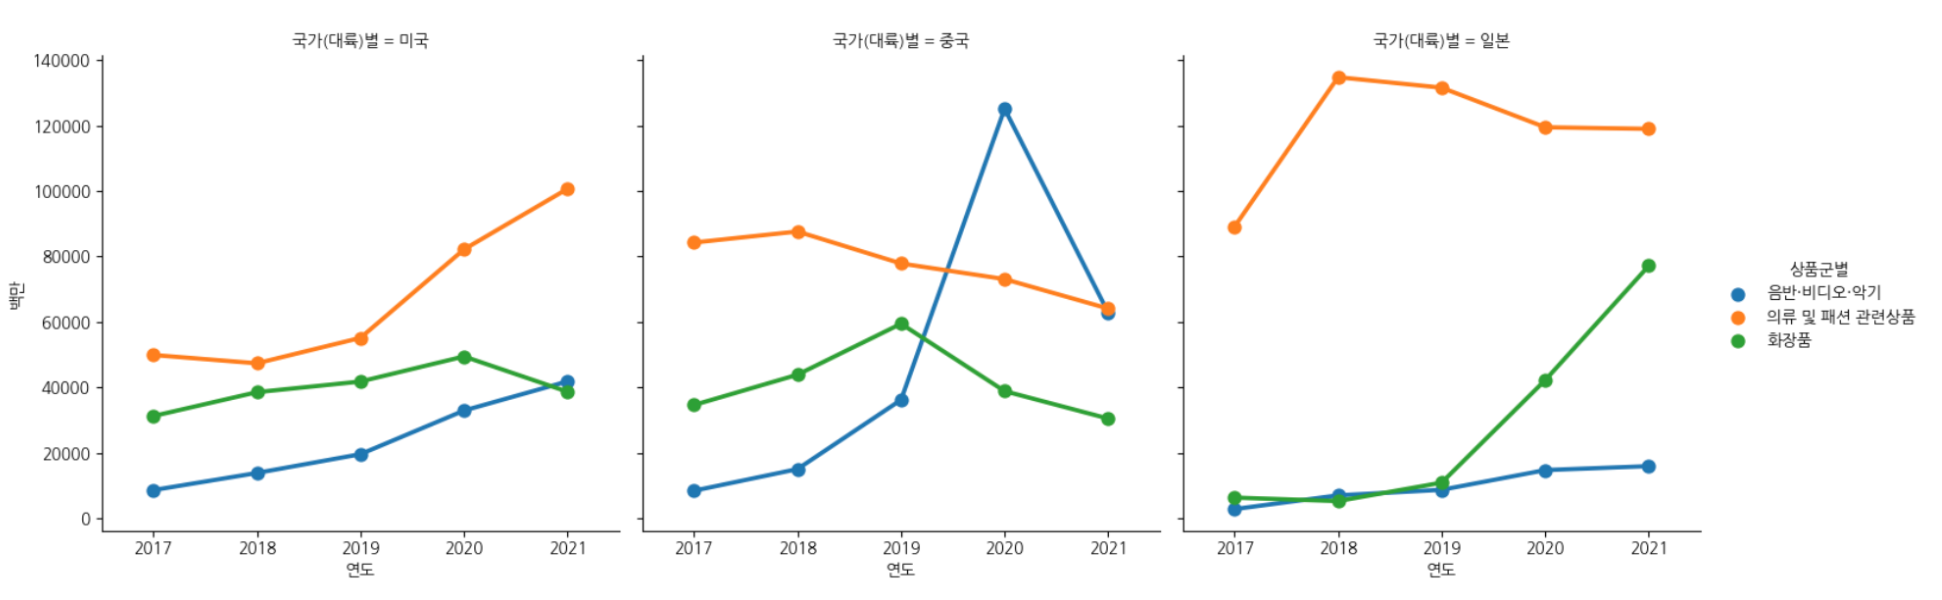

In [15]:
key_countries = ["미국", "중국", "일본"]
key_products = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

filtered_df = df[(df['국가(대륙)별'].isin(key_countries)) & (df['상품군별'].isin(key_products))]

In [16]:
filtered_df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922.0,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778.0,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281.0,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647.0,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362.0,2018,1
...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768.0,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380.0,2021,3
811,일본,화장품,면세점 이외,2021.4/4,22555.0,2021,4
812,일본,화장품,면세점 이외,2022.1/4,26664.0,2022,1


<Figure size 800x700 with 0 Axes>

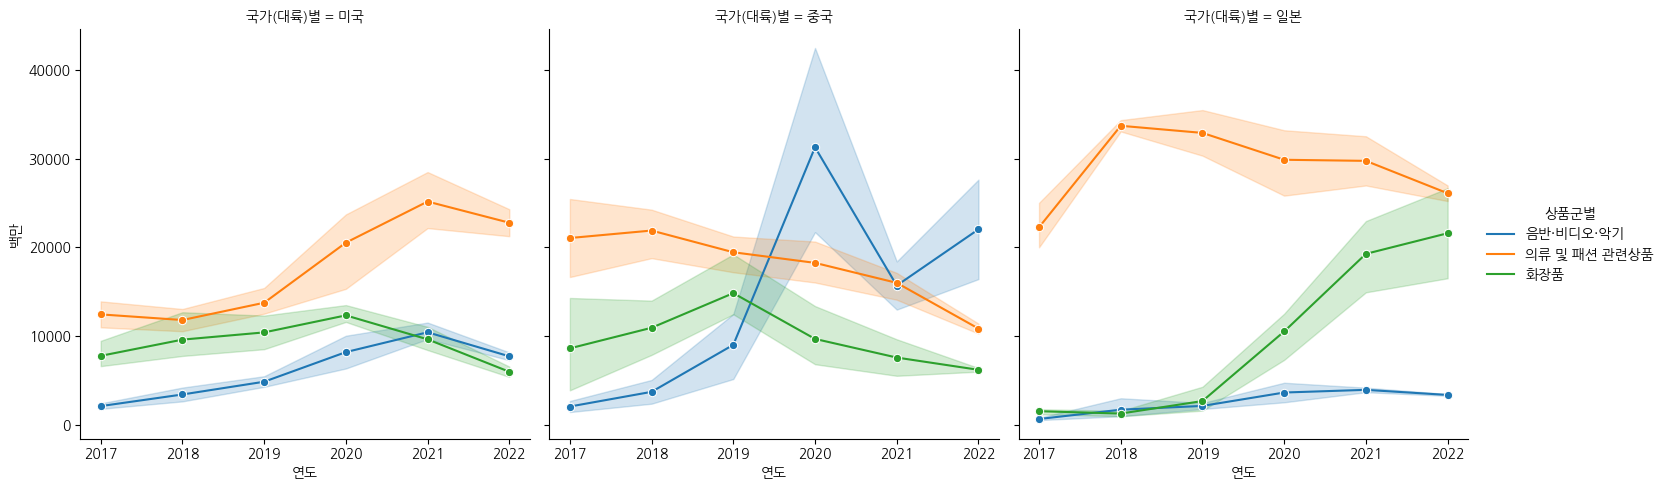

In [17]:
plt.figure(figsize=(8, 7))
sns.relplot(data=filtered_df, x="연도", y="백만", hue="상품군별", col="국가(대륙)별", kind="line",marker='o')

#📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

* 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
* KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
* 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
* 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.
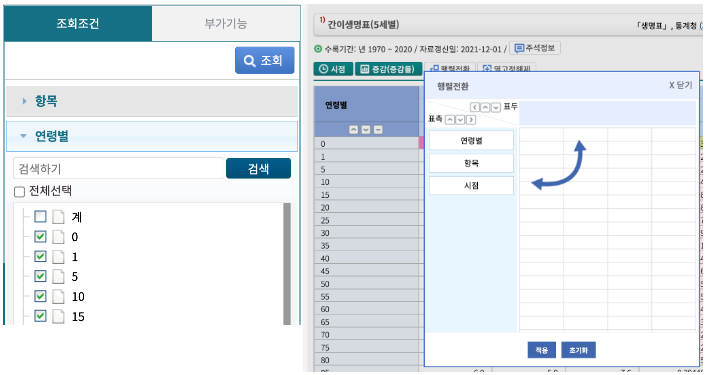

In [18]:
#학업 성적별 수면부족 원인 분석
#https://kosis.kr/statHtml/statHtml.do?orgId=402&tblId=DT_ES2017_032&conn_path=I2

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
%cd /content/gdrive/My\ Drive/DataScience2023

/content/gdrive/My Drive/DataScience2023


In [20]:
lack_sleep=pd.read_csv('lack_sleep.csv')

In [21]:
lack_sleep

,응답자유형별(1),응답자유형별(2),수면부족현황별(1),수면부족현황별(2),2022
0,학업성적별,상,수면 부족 여부,예,49.7
1,학업성적별,상,수면 부족 여부,아니오,50.3
2,학업성적별,상,수면 부족 이유(1순위),야간자율학습,6.4
3,학업성적별,상,수면 부족 이유(1순위),학원 과외,21.8
4,학업성적별,상,수면 부족 이유(1순위),가정학습(숙제 인터넷강의),30.2
5,학업성적별,상,수면 부족 이유(1순위),게임(인터넷게임 휴대전화게임 포함),9.7
6,학업성적별,상,수면 부족 이유(1순위),채팅(카톡 등) 문자메시지,5.1
7,학업성적별,상,수면 부족 이유(1순위),인터넷 사이트(동영상 만화 블로그 등) 이용,12.3
8,학업성적별,상,수면 부족 이유(1순위),드라마 영화 시청 음악 청취 등,6.7
9,학업성적별,상,수면 부족 이유(1순위),기타,7.7


In [32]:
#수면부족여부 지우기
lacksleep_cause=lack_sleep[lack_sleep["수면부족현황별(1)"]!="수면 부족 여부"]

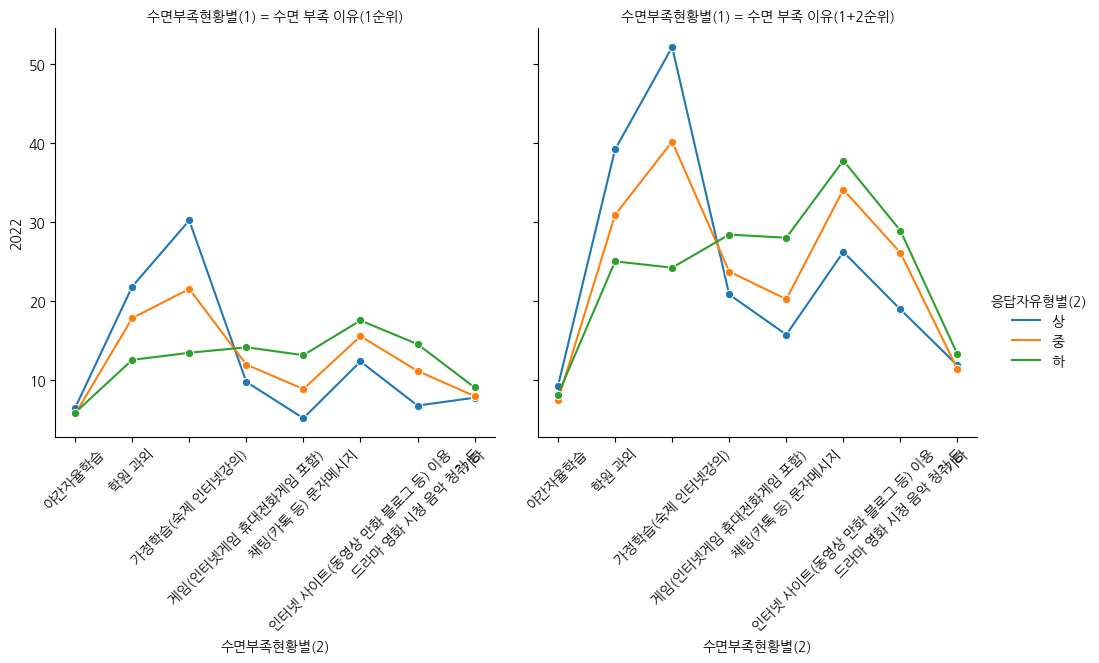

In [39]:
# 그래프 그리기
g = sns.relplot(data=lacksleep_cause, x="수면부족현황별(2)", y="2022", hue="응답자유형별(2)", col="수면부족현황별(1)", kind="line", marker='o')

# x 축 라벨 기울이기
g.set_xticklabels(rotation=45)  # 각도 조절

# 그래프 출력
plt.show()

#상,중위권 학생은 가정학습(숙제, 인터넷 강의) 하위권 학생은 인터넷 사이트가 제일 높게 나타남